<a href="https://colab.research.google.com/github/iaZe/Ideias-e-Aprendizados/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pyspark

### Aqui faremos os imports e leitura do arquivo

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Dataframe lê o csv usando pandas
df = pd.read_csv("/content/netflix.csv")

# Mostrar o que foi lido pelo pd
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Agora faremos a limpeza do arquivo usando o dropna nas tabelas de duração, diretor e elenco

In [17]:
df.dropna(subset= ['duration'], inplace=True)
df.dropna(subset= ['director', 'cast'], inplace=True)

df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

df.shape

(5697, 12)

### Após a limpeza, restaram essa quantidade de dados (5697 linhas) nas 12 colunas

### Agora usando o plotly express, faremos o primeiro gráfico, para mostrar a divisão de tipos de conteúdo disponivéis na netflix

In [18]:
# Primeiro vamos pegar o dataframe e agrupar por tipo e contar quantas vezes eles aparecem e passar pro content
content = df.groupby(['type']).size().reset_index(name='counts')

# Criaremos uma figura usando o gráfico "torta" (A.K.A Gráfico Pizza) com o plotly express, passando o conteúdo de content
figure = px.pie(content, names = 'type', values = 'counts', color_discrete_sequence = px.colors.sequential.Agsunset,
             title = 'Tipos de conteúdo na Netflix', height =  500, width = 700)

#Agora mostrar o gráfico
figure.show()

### Usando o matplotlib, vamos criar um gráfico de colunas para mostrar os maiores produtores de conteudo por continente

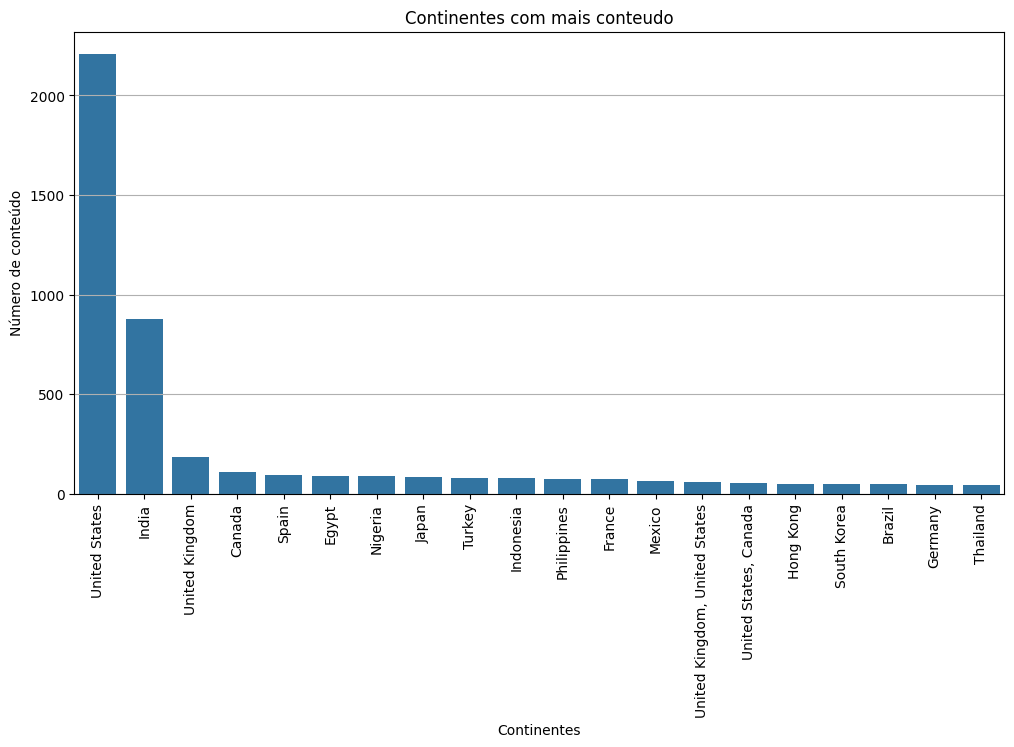

In [19]:
# Primeiro vamos pegar os dados do dataframe, contando a quantidade de vezes que os continentes aparecem (limitando em 20)
top_countries = df['country'].value_counts().head(20)

# Vamos criar o gráfico passando seu tamanho
plt.figure(figsize=(12, 6))

# Agora, usando seaborn, vamos definir os eixos x e y, sendo x os paises e y seus valores
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Continentes com mais conteudo')
plt.xlabel('Continentes')
plt.ylabel('Número de conteúdo')
plt.grid(True, axis='y')
plt.xticks(rotation=90)

# Depois de configurar o gráfico, passando os titulos, vamos mostrar
plt.show()

### Novamente usando o plotly express, vamos criar um mapa de calor que mostra os anos com mais lançamentos

In [20]:
# Aqui, vamos criar uma gráfico de barras, com x sendo o ano e y sendo o número de lançamentos
# Vamos definir que o número de lançamentos irá definir o mapa de calor

figure = px.bar(x=df["release_year"].value_counts().index,
             y=df["release_year"].value_counts().values,
             color=df["release_year"].value_counts().index)

# Depois, atualizaremos o layout, passando os titulos e cores das fontes e já exibindo de forma direta
figure.update_layout(
    title={
        'text': "Ano de lançamento",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Ano de lançamento",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Quantidade",
        'font': {'color': 'black'}
    },
)

### Voltando ao matplotlib, vamos criar um top 10 generos

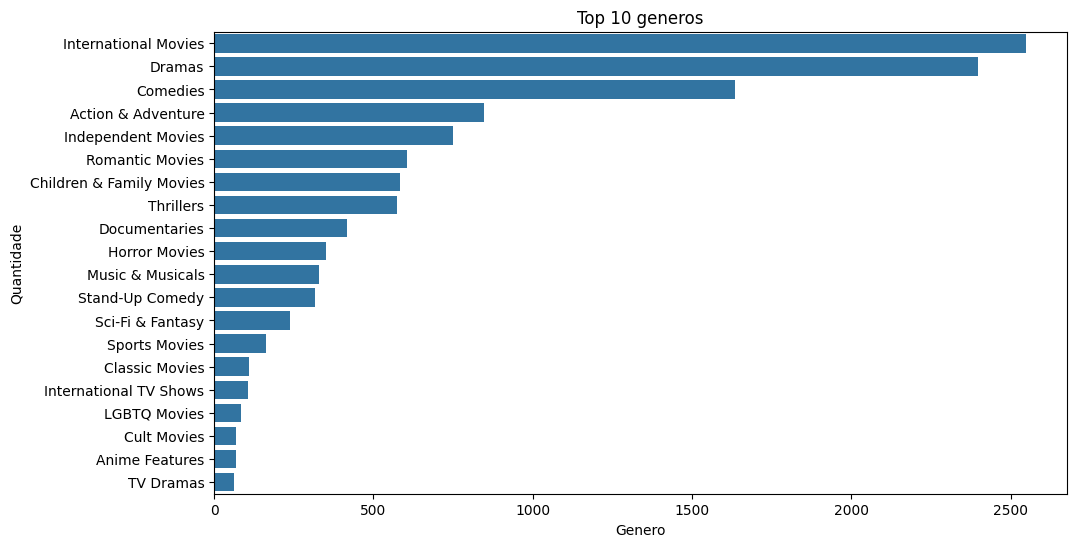

In [21]:
# Novamente, vamos formatar o dataframe, separando os generos usando o str split
figure = df['listed_in'] = df['listed_in'].str.split(', ')

# Agora vamos criar o gráfico passando o x e y pro seaborn
plt.figure(figsize=(11, 6))
genres = df['listed_in'].explode().value_counts().head(20)
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 generos')
plt.xlabel('Genero')
plt.ylabel('Quantidade')

# E mostraremos o gráfico
plt.show()

### Para diferenciar, vamos fazer uma mostragem da média de duração dos filmes

<ipython-input-22-604baaa66523>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-604baaa66523>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



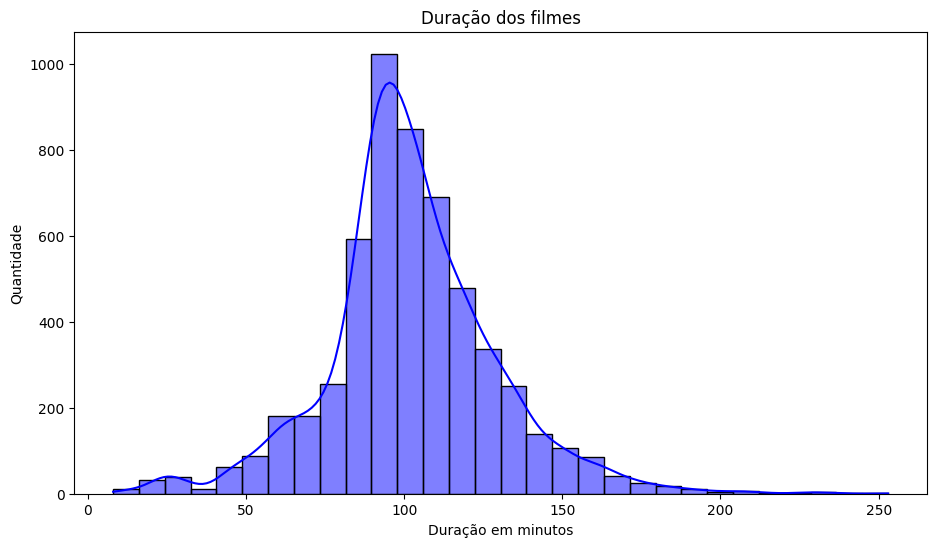

In [22]:
# Aqui, vamos formatar o dataframe selecionando somente filmes, e transformando a duração em inteiro
movie_df = df[df['type'] == 'Movie']
movie_df['duration'] = movie_df['duration'].str.replace(' min', '')
movie_df['duration'] = movie_df['duration'].astype(int)

# Novamente, usando o seaborn e o matplotlib vamos configurar o gráfico
plt.figure(figsize=(11, 6))

# Dessa vez, passamos kde, que é a linha da média, uma forma uma distribuição mais agradável
sns.histplot(movie_df['duration'], bins=30, kde=True, color='blue')
plt.title('Duração dos filmes')
plt.xlabel('Duração em minutos')
plt.ylabel('Quantidade')

# E esse é o resultado
plt.show()

### E por último, vamos fazer um top 10 dos diretores com mais filmes

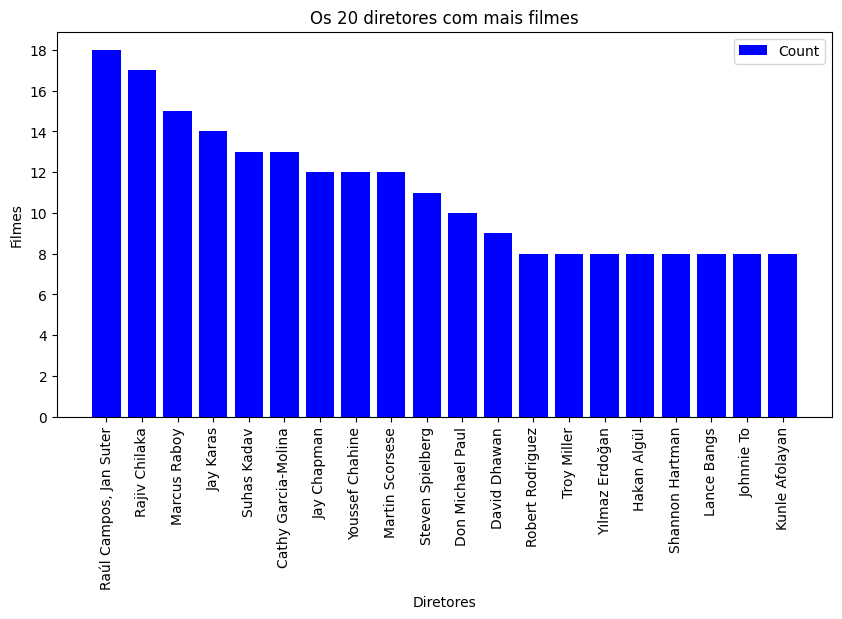

In [23]:
# Primeiro, formatar o data frame, selecionar apenas filmes, contar os valores e ordenar pelos maiores
directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:20].reset_index()
directors_movie

# Agora vamos organizar o gráfico
plt.figure(figsize=(10,5))
plt.bar(directors_movie['director'],directors_movie['count'], color = "blue" , label='Count')
plt.title('Os 20 diretores com mais filmes')
plt.xlabel('Diretores')
plt.ylabel('Filmes')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()